In [14]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [15]:
transform = transforms.ToTensor()
train_DT = datasets.CIFAR10(root='./dataset', train=True, transform=transform, download=True)
test_DT = datasets.CIFAR10(root='./dataset', train=False, transform=transform, download=True)

print(train_DT)
print(test_DT)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./dataset
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./dataset
    Split: Test
    StandardTransform
Transform: ToTensor()


In [54]:
CLASS_TO_IDX = train_DT.class_to_idx
IDX_TO_CLASS = {value: key for key, value in CLASS_TO_IDX.items()}

print(CLASS_TO_IDX)
print(IDX_TO_CLASS)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [72]:
class CustomDataset(Dataset):
    def __init__(self, Dataset):
        self.data = torch.tensor(Dataset.data).permute(0, 3, 1, 2) / 255.0
        self.label = torch.tensor(Dataset.targets)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        return self.data[index], self.label[index]

torch.Size([64, 3, 32, 32]) torch.Size([64])
tensor([[[0.3882, 0.4431, 0.4471,  ..., 0.4824, 0.4706, 0.4627],
         [0.3373, 0.3490, 0.3647,  ..., 0.5020, 0.4863, 0.4745],
         [0.5490, 0.5098, 0.5451,  ..., 0.5176, 0.5059, 0.4980],
         ...,
         [0.8157, 0.8039, 0.8039,  ..., 0.4196, 0.4235, 0.4353],
         [0.8118, 0.7922, 0.7765,  ..., 0.4118, 0.3647, 0.3569],
         [0.8000, 0.7765, 0.7725,  ..., 0.3882, 0.3529, 0.3176]],

        [[0.3255, 0.3804, 0.3843,  ..., 0.4157, 0.4039, 0.3961],
         [0.2863, 0.2980, 0.3176,  ..., 0.4275, 0.4157, 0.4039],
         [0.5176, 0.4745, 0.5137,  ..., 0.4392, 0.4235, 0.4157],
         ...,
         [0.7529, 0.7451, 0.7490,  ..., 0.3843, 0.3882, 0.4000],
         [0.7490, 0.7412, 0.7529,  ..., 0.3765, 0.3412, 0.3333],
         [0.7333, 0.7294, 0.7608,  ..., 0.3529, 0.3333, 0.3020]],

        [[0.2667, 0.3216, 0.3255,  ..., 0.3137, 0.3020, 0.2941],
         [0.2471, 0.2667, 0.2784,  ..., 0.3216, 0.3098, 0.2980],
         [0.4

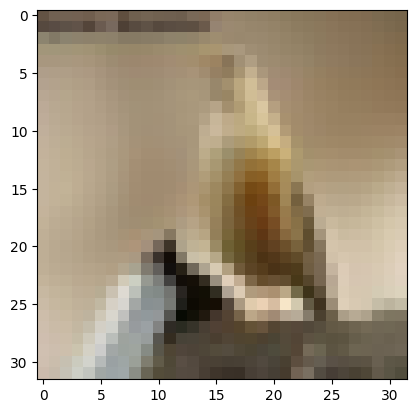

In [77]:
train_dataset = CustomDataset(train_DT)
test_dataset = CustomDataset(test_DT)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, drop_last=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True, drop_last=True)

for x, y in train_dataloader:
    print(x.shape, y.shape)
    print(x[0])
    plt.imshow(x[0].permute(1, 2, 0))
    print(IDX_TO_CLASS[int(y[0])])
    break

In [82]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Sequential(
            nn.Linear(3*32*32, 100),
            nn.ReLU()
        )

        self.layer2 = nn.Sequential(
            nn.Linear(100, 10)
        )
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.layer1(x)
        x = self.layer2(x)
        return x

In [109]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = MLP().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(params=model.parameters(), lr=0.001)

model.train()

for epoch in range(300):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss
    
    cost = cost / len(train_dataloader)

    if (epoch+1)%10 == 0:
        print(f'Epoch:{epoch+1:3}   Loss:{cost}')
    

Epoch: 10   Loss:1.5449293851852417
Epoch: 20   Loss:1.487446904182434
Epoch: 30   Loss:1.459074854850769
Epoch: 40   Loss:1.4367457628250122
Epoch: 50   Loss:1.4190566539764404
Epoch: 60   Loss:1.4048669338226318
Epoch: 70   Loss:1.3948982954025269
Epoch: 80   Loss:1.3823423385620117
Epoch: 90   Loss:1.3742623329162598
Epoch:100   Loss:1.363287329673767
Epoch:110   Loss:1.3583455085754395
Epoch:120   Loss:1.3504210710525513
Epoch:130   Loss:1.341563105583191
Epoch:140   Loss:1.3370000123977661
Epoch:150   Loss:1.3269233703613281
Epoch:160   Loss:1.3247450590133667
Epoch:170   Loss:1.3180181980133057
Epoch:180   Loss:1.313679575920105
Epoch:190   Loss:1.3068350553512573
Epoch:200   Loss:1.3012621402740479
Epoch:210   Loss:1.2994967699050903
Epoch:220   Loss:1.2908512353897095
Epoch:230   Loss:1.289064884185791
Epoch:240   Loss:1.286436676979065
Epoch:250   Loss:1.2834653854370117
Epoch:260   Loss:1.2794034481048584
Epoch:270   Loss:1.2795660495758057
Epoch:280   Loss:1.2737828493118286

In [110]:
correct = 0
wrong = 0

with torch.no_grad():
    model.eval()

    for x, y in test_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        pred_y = torch.argmax(output, dim=1)
        
        for idx in range(len(output)):
            if y[idx] == pred_y[idx]:
                correct += 1
            else:
                wrong += 1

print(f'Correct  : {correct}')
print(f'Wrong    : {wrong}')
print(f'Accuracy : {round(correct/(correct+wrong)*100, 2)}%')

Correct  : 4508
Wrong    : 5476
Accuracy : 45.15%


In [111]:
for x, y in test_dataloader:
    print(x[0])
    break

for x, y in train_dataloader:
    print(x[0])
    break

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.8863, 0.8784, 0.8745],
         [0.9922, 0.9961, 1.0000,  ..., 0.8824, 0.8784, 0.8745],
         [0.9922, 1.0000, 1.0000,  ..., 0.8941, 0.8902, 0.8824],
         ...,
         [0.6549, 0.6588, 0.6627,  ..., 0.4157, 0.4157, 0.4235],
         [0.5137, 0.4510, 0.5020,  ..., 0.3529, 0.3608, 0.3765],
         [0.4745, 0.3882, 0.4392,  ..., 0.3843, 0.3882, 0.3961]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8902, 0.8824, 0.8745],
         [0.9922, 0.9961, 1.0000,  ..., 0.8863, 0.8784, 0.8745],
         [0.9922, 1.0000, 1.0000,  ..., 0.8980, 0.8902, 0.8824],
         ...,
         [0.6588, 0.6627, 0.6667,  ..., 0.3961, 0.3961, 0.4039],
         [0.4784, 0.4157, 0.4667,  ..., 0.3294, 0.3373, 0.3529],
         [0.4549, 0.3725, 0.4196,  ..., 0.3529, 0.3529, 0.3608]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8706, 0.8706, 0.8667],
         [0.9922, 0.9961, 1.0000,  ..., 0.8667, 0.8706, 0.8667],
         [0.9922, 1.0000, 1.0000,  ..., 0.8784, 0.8784, 0.